In [1]:
import numpy as np

In [5]:
a = np.array([1,2,3])
a = a ** 2
a

array([1, 4, 9])

In [6]:
a.clip(0,5)

array([1, 4, 5])

In [7]:
a[a>2]

array([4, 9])

Scipy packages:

- cluster
- constants
- discrete fourier transforms
- integration
- interpolation
- io
- linear algebra
- images
- orthogonal distance
- optimization
- signal processing
- sparse matrices
- spatial data structures
- special maths
- stats


In [8]:
urlForData = "https://github.com/luispedro/BuildingMachineLearningSystemsWithPython/blob/master/ch01/data/web_traffic.tsv"

In [9]:
import scipy as sp
data = sp.genfromtxt("web_traffic.tsv", delimiter = "\t")

In [10]:
data.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [11]:
data

array([[  1.00000000e+00,   2.27200000e+03],
       [  2.00000000e+00,              nan],
       [  3.00000000e+00,   1.38600000e+03],
       ..., 
       [  7.41000000e+02,   5.39200000e+03],
       [  7.42000000e+02,   5.90600000e+03],
       [  7.43000000e+02,   4.88100000e+03]])

In [12]:
data.shape

(743, 2)

In [18]:
x = data[:,0]
y = data[:,1]

In [20]:
y

array([ 2272.,    nan,  1386.,  1365.,  1488.,  1337.,  1883.,  2283.,
        1335.,  1025.,  1139.,  1477.,  1203.,  1311.,  1299.,  1494.,
        1159.,  1365.,  1272.,  1246.,  1071.,  1876.,    nan,  1410.,
         925.,  1533.,  2104.,  2113.,  1993.,  1045.,  2090.,  2227.,
        1413.,  1718.,  1721.,  1291.,  1838.,  2540.,  1608.,  2455.,
        1929.,  1767.,  1203.,  1761.,  1723.,  2160.,   808.,    nan,
        1324.,  1809.,  1933.,  1351.,  2013.,  1207.,  2170.,  1700.,
        1899.,  1757.,  1475.,  1921.,  1971.,  1809.,  1365.,  1775.,
        1687.,  1706.,  1353.,  1316.,  1512.,  2430.,  1788.,  1380.,
        1357.,   990.,  1586.,  2057.,  1690.,  1458.,  1201.,  1949.,
        1493.,  1653.,  1217.,  1457.,  1179.,  1484.,  2730.,  1414.,
        1060.,  1573.,  1260.,  1216.,   981.,  1345.,    nan,  1667.,
         730.,  1034.,  1628.,  1155.,  1305.,  1444.,  2242.,  1842.,
        1210.,  1384.,  1313.,  1508.,  1796.,  1265.,  1090.,  2159.,
      

(array([  40.,  227.,  244.,  119.,   34.,   27.,   20.,   15.,    7.,    2.]),
 array([  472. ,  1015.4,  1558.8,  2102.2,  2645.6,  3189. ,  3732.4,
         4275.8,  4819.2,  5362.6,  5906. ]),
 <a list of 10 Patch objects>)

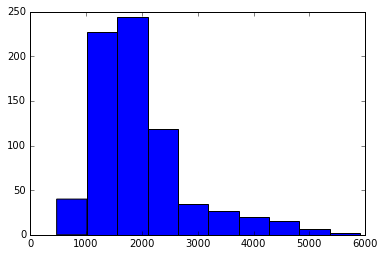

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.hist(y[~sp.isnan(y)])

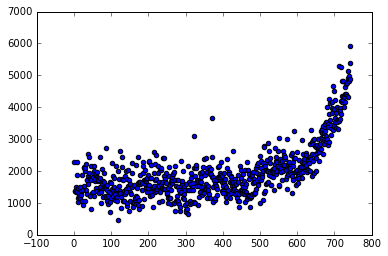

In [26]:
plt.scatter(x[~sp.isnan(y)], y[~sp.isnan(y)])

In [28]:
def sum_squared_error(f, x, y):
    return sp.sum((y - f(x)) ** 2)

In [31]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full = True)

In [34]:
f1 = sp.poly1d(fp1)

In [36]:
print(sum_squared_error(f1, x, y))

317389767.34


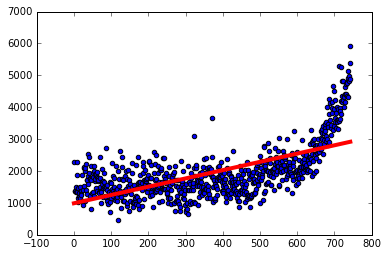

In [38]:
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), color = "r", linewidth = 4)
plt.scatter(x, y)

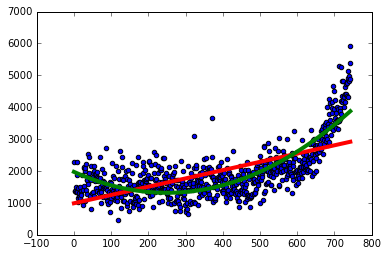

In [40]:
## Compare to a more complex model
fp2, residuals, rank, sv, rcond = sp.polyfit(x, y, 2, full = True)
f2 = sp.poly1d(fp2)
plt.plot(fx, f1(fx), color = "r", linewidth = 4)
plt.scatter(x, y)

plt.plot(fx, f2(fx), color = "g", linewidth = 4)


Chapter 2

In [41]:
from sklearn.datasets import load_iris

In [42]:
data = load_iris()

In [43]:
data

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [44]:
features, feature_names = data.data, data.feature_names

In [45]:
target = data.target

In [46]:
target_names = data.target_names

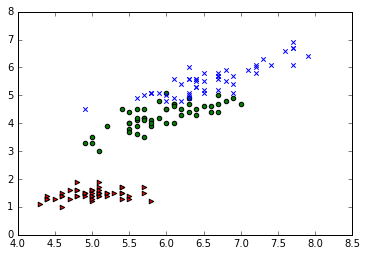

In [49]:
for t in range(3):
    if t == 0:
        c = 'r'
        marker = '>'
    elif t == 1:
        c = 'g'
        marker = 'o'
    elif t ==2:
        c = 'b'
        marker = 'x'
    plt.scatter(features[target ==t, 0], 
                features[target ==t, 2],
                marker = marker,
                c = c
               )

In [51]:
feature_names[0],feature_names[2]

('sepal length (cm)', 'petal length (cm)')

In [52]:
labels = target_names[target]

In [53]:
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [54]:
is_setosa = (labels == 'setosa')

In [55]:
is_setosa

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [57]:
plength = features[:, 2]
max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()

In [58]:
max_setosa, min_non_setosa

(1.8999999999999999, 3.0)

To avoid overfitting need to keep some data back to test on.  One nice solution is cross validation, sequentially leave out some of the data and train the model.  Balance between the extra time taken to run and the gain in the amount of data that you can use to train the model

Need to ensure that the folds are balanced - all of the left out data shouldn't come from just one class otherwise the outcome will not be representative (selection bias)

Three high level features of a model:

- The structure (how does it decide etc)
- The way that is searches (gradient descent, brute force etc)
- Nature of loss function (what do we actually are about (type a, type B))

Feature engineering: creating new features from existing features in the dataset (e.g. area from width and height)

Look to create something that varies with what matters and to be invariant to what does not

Classifying with scikit-learn:
    
    Objects based on two main functions = fit(features, labels) and predict(features)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
classifier = KNeighborsClassifier(n_neighbors = 1)

In [61]:
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [62]:
from sklearn.cross_validation import KFold

kf = KFold(len(features), n_folds = 5, shuffle = True)

In [63]:
means = []
for training, testing in kf:
    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])
    
    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)

In [64]:
np.mean(means)

0.95999999999999996

When units are in different units and scales, important to normalize them:

$$ f' = \frac{f - \mu}{\sigma}$$

Subtract the mean and divide by the standard deviation to make all of the features on the same scale

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [66]:
classifier = KNeighborsClassifier(n_neighbors = 1)

In [68]:
classifier = Pipeline([('norm', StandardScaler()), ('knn', classifier)])

Pipeline takes a list of pairs (str, clf) and chains them together into one process.

In [69]:
means = []
for training, testing in kf:
    classifier.fit(features[training], labels[training])
    prediction = classifier.predict(features[testing])
    
    curmean = np.mean(prediction == labels[testing])
    means.append(curmean)

In [70]:
np.mean(means)

0.94000000000000006

Chapter 3 - Clustering finding related posts


Goal is to construct clusters such that all items in a cluster are as similar to each other as possible while items in different clusters are as different as possible

Procedure:

    - Extract features into a vector 
    - Compute similar clustering on the vectors
    - Determine cluster of most recent post
    - Fetch a handful of posts from this cluster

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1)

In [73]:
content = ["Hello world my name is Jake", "Hello world"]

In [74]:
output = vectorizer.fit_transform(content)

In [75]:
output

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [76]:
vectorizer.get_feature_names()

['hello', 'is', 'jake', 'my', 'name', 'world']

In [77]:
output.toarray()

array([[1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1]], dtype=int64)

In [79]:
def vector_distance(vector1, vector2):
    difference = vector1 - vector2
    return sp.linalg.norm(difference.toarray())

In [87]:
##Need to normalize the vectors first:

def vector_distance_normalized(vector1, vector2):
    vector1n = sp.linalg.norm(vector1)
    vector2n = sp.linalg.norm(vector2)
    return sp.linalg.norm((vector1n - vector2n))

In [89]:
vector_distance_normalized(output[0,:].toarray(), output[0,:].toarray())

0.0

In [85]:
output[0,:].toarray()

array([[1, 1, 1, 1, 1, 1]], dtype=int64)

In [90]:
#vectorizer = CountVectorization(min_df = 1, stop_words = 'english')  Removes common english words that don't aid classification

In [91]:
import nlkt

ImportError: No module named 'nlkt'

Steps:

 - Tokenize
 - Throw away words that occur too frequently
 - Throw away words that occur too seldom to be useful in future predictions
 - Count remaining words
 - Calculate TF - IDF

Issues:
    
    - No taking into account syntax: man bit dog v dog bit man
    - Negations
    - Misspellings

In [93]:
import sklearn.datasets

In [94]:
data = sklearn.datasets.fetch_20newsgroups(subset = 'all')

In [95]:
print(len(data.filenames))

18846
